<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/VolatilitySurface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Volatility Surface Plot

In [2]:
#!pip install yfinance

In [3]:

import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from mpl_toolkits import mplot3d
from datetime import datetime
from itertools import chain
from matplotlib import cm

In [9]:
# choose a ticker and get data
sTicker = "UUUU"
stock = yf.Ticker(sTicker)

# store maturities
lMaturity = list(stock.options)

In [10]:
# get current date
today = datetime.now().date()
# empty list for days to expiration
lDTE = []

# empty list to store data for calls
lData_calls = []

# loop over maturities
for maturity in lMaturity:
    # maturity date
    maturity_date = datetime.strptime(maturity, '%Y-%m-%d').date()
    # DTE: difference between maturity date and today
    lDTE.append((maturity_date - today).days)
    # store call data
    lData_calls.append(stock.option_chain(maturity).calls)

In [11]:
# create empty lists to contain unlisted data
lStrike = []
lDTE_extended = []
lImpVol = []

for i in range(0,len(lData_calls)):
    # append strikes to list
    lStrike.append(lData_calls[i]["strike"])
    # repeat DTE so the list has same length as the other lists
    lDTE_extended.append(np.repeat(lDTE[i], len(lData_calls[i])))
    # append implied volatilities to list
    lImpVol.append(lData_calls[i]["impliedVolatility"])
    
# unlist list of lists
lStrike = list(chain(*lStrike))
lDTE_extended = list(chain(*lDTE_extended))
lImpVol = list(chain(*lImpVol))

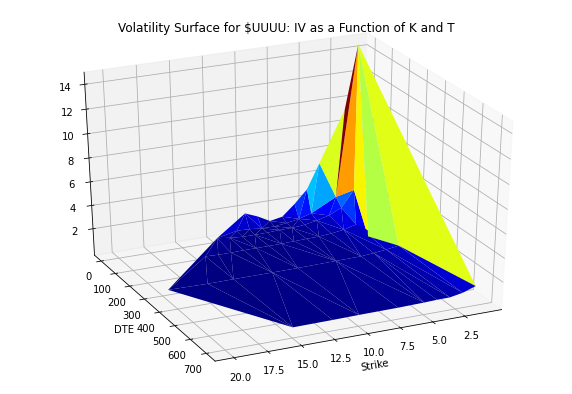

In [12]:
# initiate figure
fig = plt.figure(figsize=(10,7))

# set projection to 3d
axs = plt.axes(projection="3d")

# use plot_trisurf from mplot3d to plot surface and cm for color scheme
axs.plot_trisurf(lStrike, lDTE_extended, lImpVol, cmap=cm.jet)

# change angle
axs.view_init(30, 65)

# add labels
plt.xlabel("Strike")
plt.ylabel("DTE")
plt.title("Volatility Surface for $"+sTicker+": IV as a Function of K and T")
plt.show()